In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Reading the dataset
df = pd.read_csv('.\datasets\customer_churn_iqr_removed.csv')
print(df.shape)
df.head(10)

(1631, 14)


,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,0
3,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,0
4,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,0
5,7,0,38,1,4515,83,2,25,3,1,1,30,191.920,0
6,6,0,38,0,5918,95,7,12,3,1,1,30,268.520,0
7,9,0,38,0,2238,54,8,17,3,1,2,30,123.680,0
8,3,0,37,1,6500,86,186,26,3,1,1,30,1007.440,0
9,0,0,37,0,875,14,0,11,2,1,2,25,40.005,1


In [6]:
# Find data types for each column
df.dtypes

Call Failure                 int64
Complaints                   int64
Subscription Length          int64
Charge Amount                int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

In [7]:
## Select only columns that are numerical - 'float 64'
columns_float64 = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
print(f'numerical columns: {columns_float64}')
print(f'number of numerical columns: {len(columns_float64)}')

## Select only columns that are categorical - 'object'
columns_object = df.select_dtypes(include='object').columns.to_list()
print(f'categorical columns: {columns_object}')
print(f'number of categorical columns: {len(columns_object)}')

numerical columns: ['Call Failure', 'Complaints', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age', 'Customer Value', 'Churn']
number of numerical columns: 14
categorical columns: []
number of categorical columns: 0


In [8]:
# Find and show 'isnull' data based on columns
df.isnull().sum()

Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [9]:
# See unique values of each column
df.nunique()

Call Failure                 29
Complaints                    2
Subscription Length          29
Charge Amount                 3
Seconds of Use              956
Frequency of use            169
Frequency of SMS            176
Distinct Called Numbers      53
Age Group                     2
Tariff Plan                   2
Status                        2
Age                           2
Customer Value             1334
Churn                         2
dtype: int64

Churn
0    1289
1     342
Name: count, dtype: int64

[Text(0, 0, '1289'), Text(0, 0, '342')]

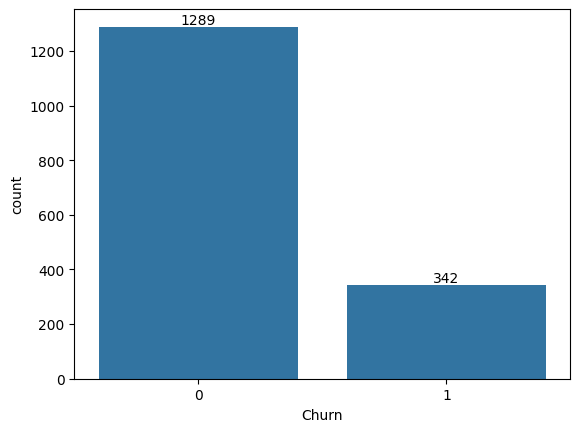

In [10]:
# Find 'NaN' values on target column
data_nan = df['Churn'].value_counts(dropna = False)
display(data_nan)

# Barplot to know the 'balance' of the dataset's target
target_barplot = sns.barplot(data_nan, estimator='sum', errorbar='sd')
target_barplot.bar_label(target_barplot.containers[0], fontsize=10)

In [11]:
# Describe numerical statistics from the dataset 
df.describe()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000
mean,6.289393,0.089516,34.449418,0.404660,3295.528510,54.461067,36.568363,18.698345,2.562845,1.040466,1.385653,27.814224,294.981048,0.209687
std,5.866689,0.285574,5.499781,0.673296,3064.326002,40.033523,56.229657,12.274108,0.496187,0.197110,0.486898,2.480935,292.458446,0.407210
min,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,25.000000,0.000000,0.000000
25%,1.000000,0.000000,32.000000,0.000000,1015.000000,24.000000,1.000000,9.000000,2.000000,1.000000,1.000000,25.000000,98.080000,0.000000
50%,5.000000,0.000000,35.000000,0.000000,2585.000000,48.000000,13.000000,17.000000,3.000000,1.000000,1.000000,30.000000,187.600000,0.000000
75%,10.000000,0.000000,38.000000,1.000000,4505.000000,79.500000,34.000000,26.000000,3.000000,1.000000,2.000000,30.000000,340.260000,0.000000
max,28.000000,1.000000,47.000000,2.000000,14078.000000,181.000000,208.000000,60.000000,3.000000,2.000000,2.000000,30.000000,1099.400000,1.000000


In [12]:
# Describe categorical statistics from the dataset

#describe_object = df.select_dtypes(include='object')
#describe_object.describe()

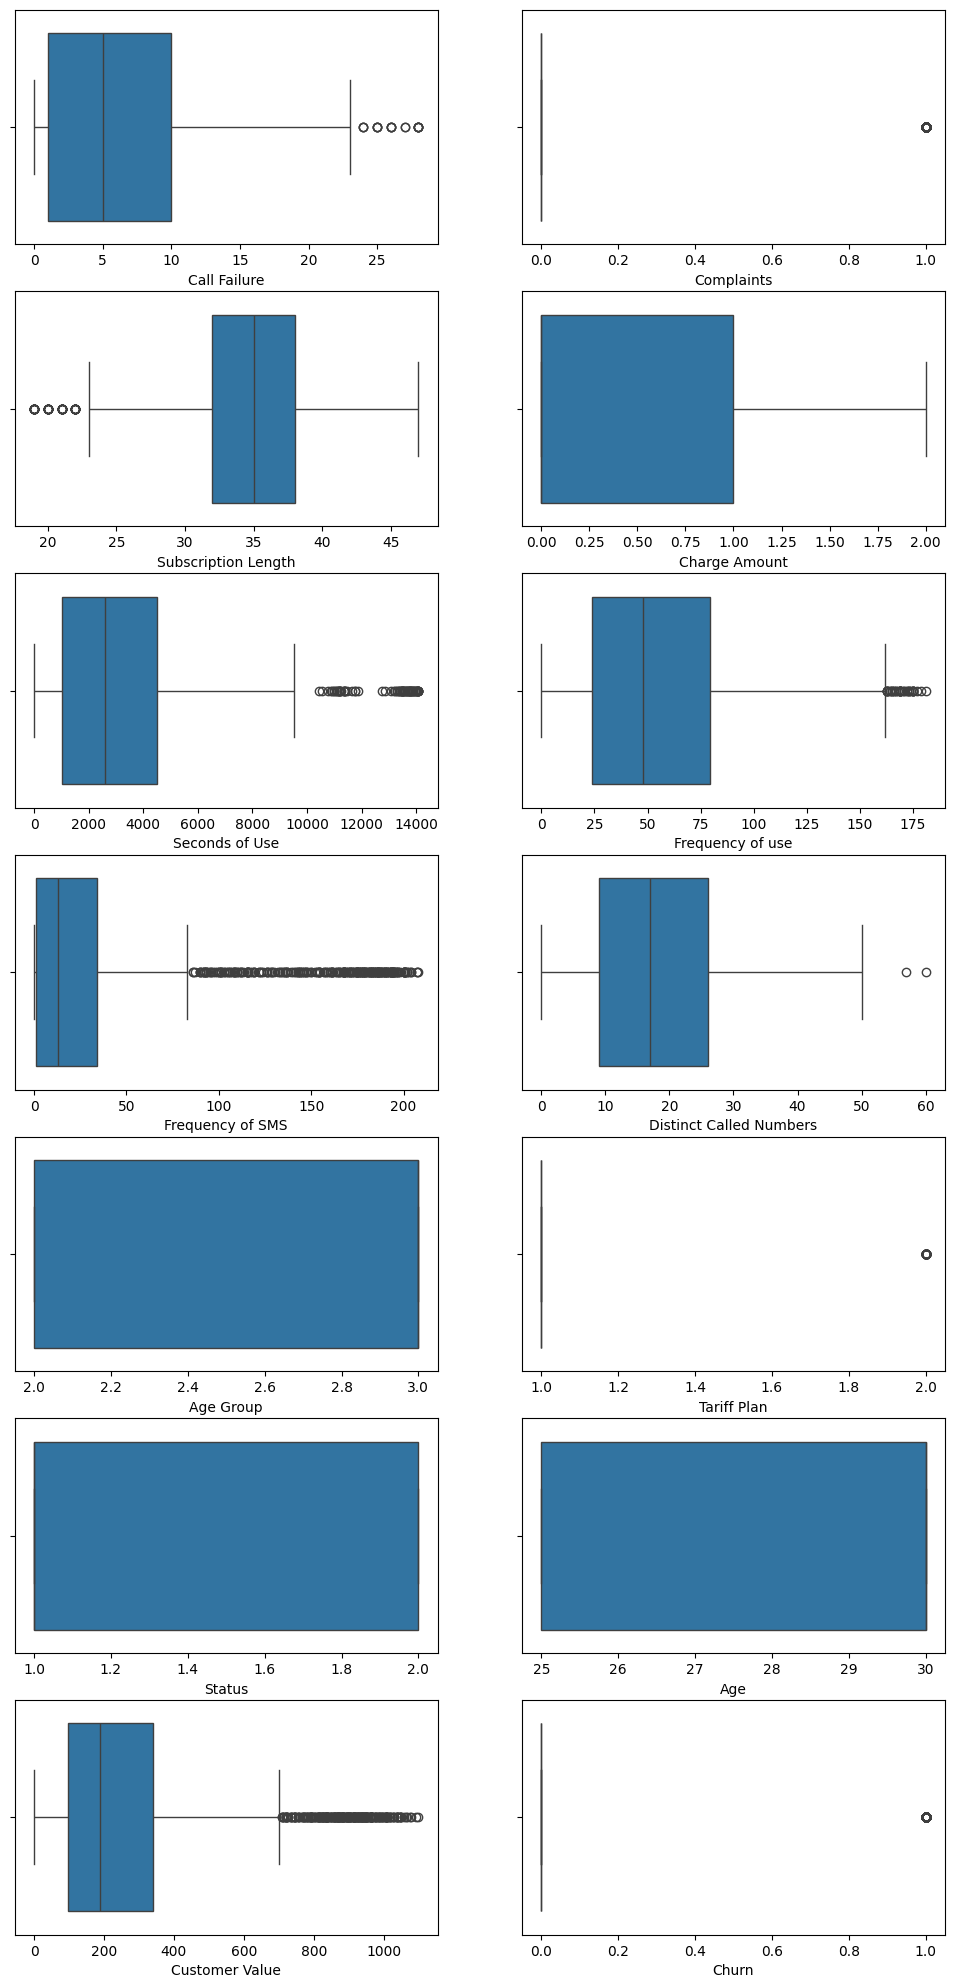

In [13]:
# Get all numerical columns 
data_boxplot = df.select_dtypes(include=['float64', 'int64'])

# Create the subplots
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(12, 25))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot each column in its corresponding subplot
for i, j in enumerate(data_boxplot.columns):
    sns.boxplot(x=data_boxplot[j], ax=axs[i])

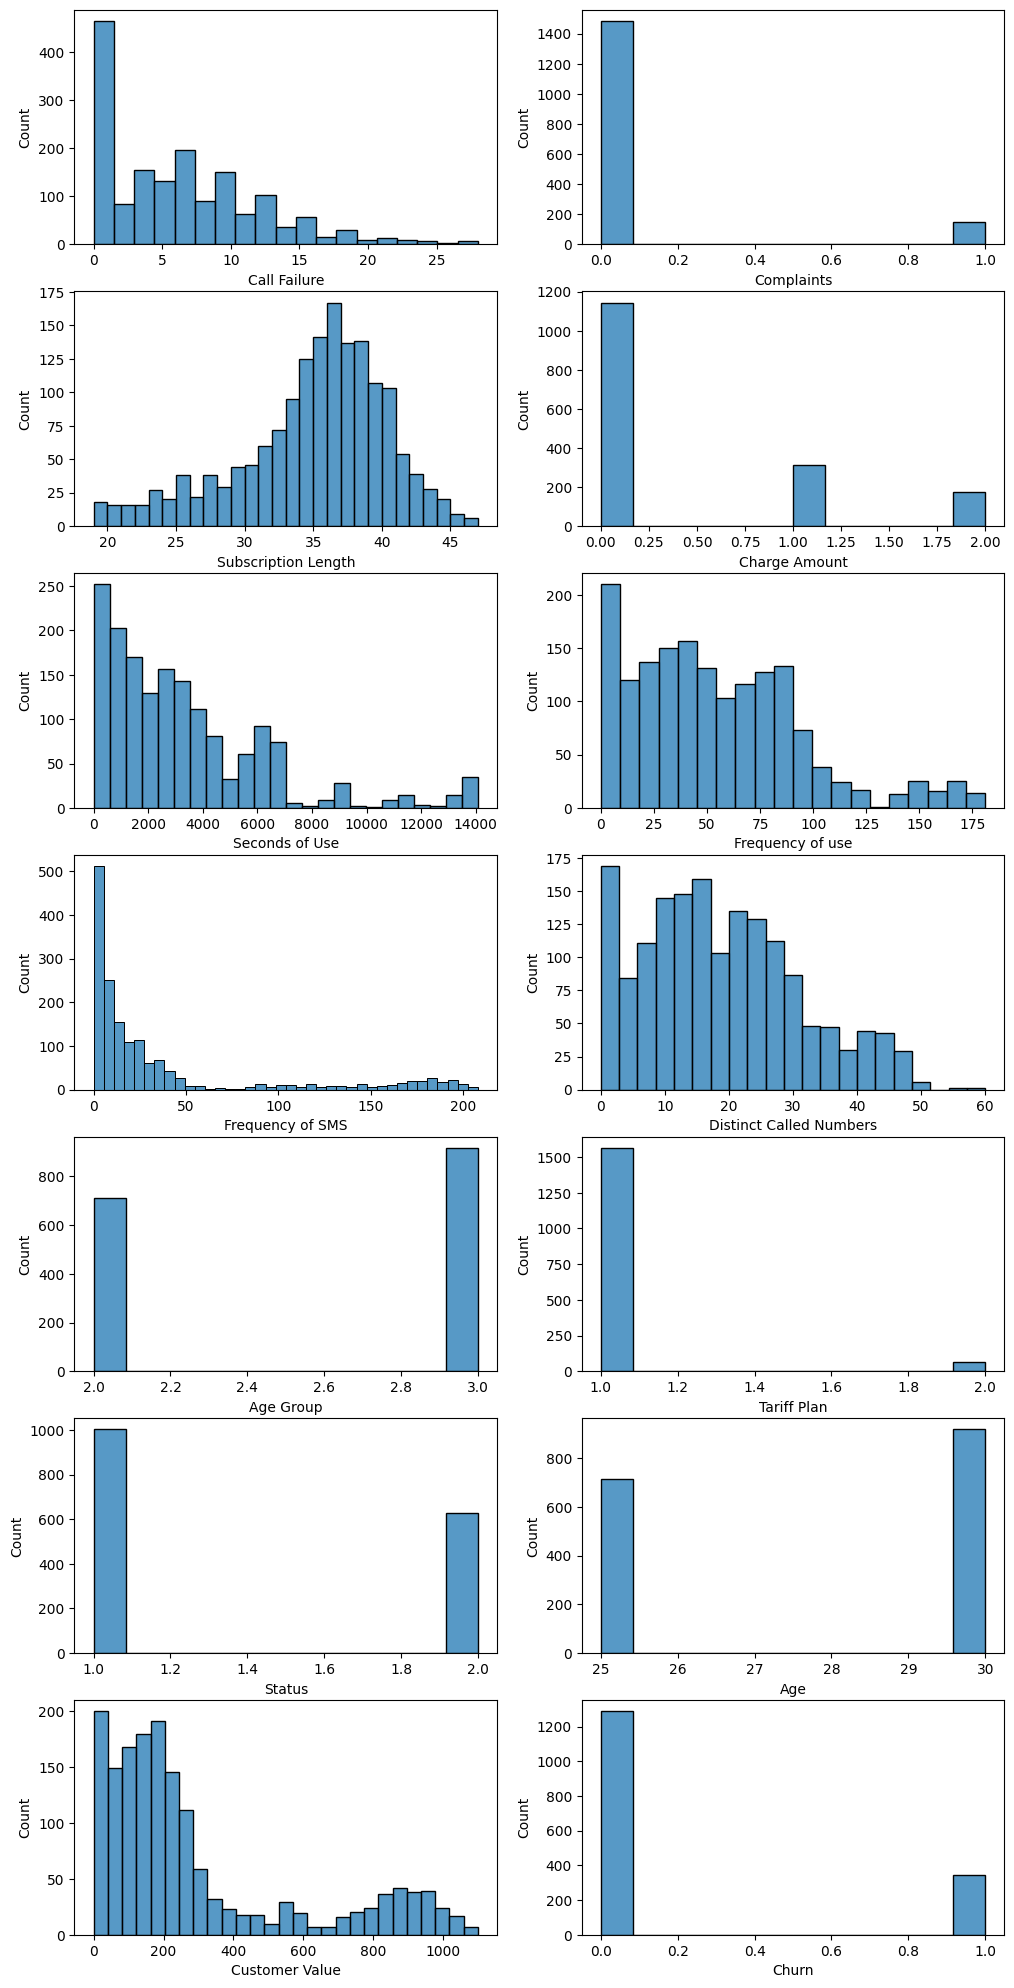

In [14]:
# Get all numerical columns 
data_histplot = df.select_dtypes(include=['float64', 'int64'])

# Create the subplots
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(12, 25))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot each column in its corresponding subplot
for i, j in enumerate(data_histplot.columns):
    sns.histplot(x=data_histplot[j], ax=axs[i])


In [15]:
# Make a Correlation Matrix

# Select only numerical data
data_correlation = df.select_dtypes(include=['float64', 'int64'])

# Correlation
correlation = data_correlation.corr()
correlation

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
Call Failure,1.000000,0.249646,0.101304,0.419816,0.142079,0.305676,0.073376,0.306742,0.058450,0.022229,-0.004302,0.058450,0.123479,0.155887
Complaints,0.249646,1.000000,0.020853,-0.137457,-0.111503,-0.081208,-0.064414,-0.020821,0.038207,0.001002,0.285446,0.038207,-0.102505,0.524322
Subscription Length,0.101304,0.020853,1.000000,0.141883,0.184616,0.170603,-0.048642,0.173522,0.218391,-0.347852,0.106147,0.218391,0.027544,0.038433
Charge Amount,0.419816,-0.137457,0.141883,1.000000,0.318994,0.392863,0.357149,0.437110,0.096451,0.181638,-0.476330,0.096451,0.426927,-0.233594
Seconds of Use,0.142079,-0.111503,0.184616,0.318994,1.000000,0.934869,0.183287,0.768609,0.231331,-0.060065,-0.562812,0.231331,0.572002,-0.267099
Frequency of use,0.305676,-0.081208,0.170603,0.392863,0.934869,1.000000,0.178882,0.819218,0.211923,0.019170,-0.585163,0.211923,0.544155,-0.278887
Frequency of SMS,0.073376,-0.064414,-0.048642,0.357149,0.183287,0.178882,1.000000,0.285829,-0.084014,0.467314,-0.327643,-0.084014,0.907581,-0.189922
Distinct Called Numbers,0.306742,-0.020821,0.173522,0.437110,0.768609,0.819218,0.285829,1.000000,0.182623,-0.021831,-0.475118,0.182623,0.564696,-0.231108
Age Group,0.058450,0.038207,0.218391,0.096451,0.231331,0.211923,-0.084014,0.182623,1.000000,-0.157746,0.002465,1.000000,-0.023580,-0.053114
Tariff Plan,0.022229,0.001002,-0.347852,0.181638,-0.060065,0.019170,0.467314,-0.021831,-0.157746,1.000000,-0.162707,-0.157746,0.377603,-0.067563


<Axes: >

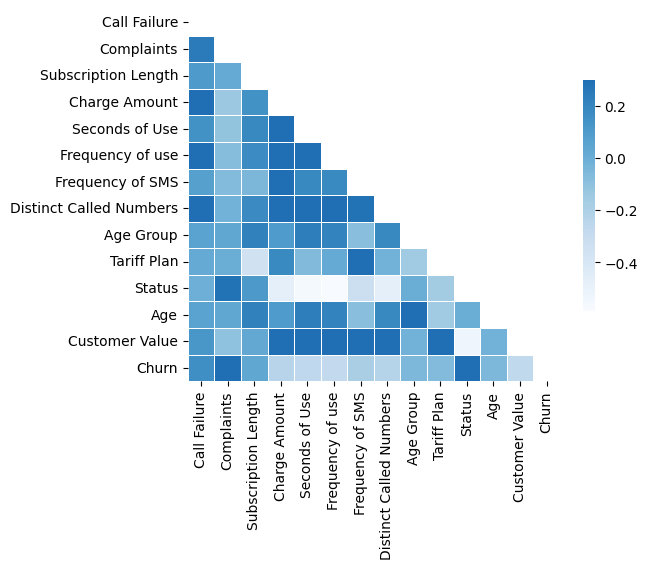

In [16]:
# Make a Correlation Heatmap

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Set up the matplotlib figure
fig, axs = plt.subplots(figsize=(6, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap='RdBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})